## Script for RMSF ananlysis

read rmsf file output from schrodinger software

In [1]:
data_path = "/Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/kcsa_1ms_kwkw.prj/RMSF_1msMD.xlsx"

In [15]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def adjust_residue_number(chain, residue_num):
    """Adjust residue number based on its chain type."""
    if chain == 'A':
        return residue_num + 21
    elif chain == 'B':
        return residue_num - 82
    elif chain == 'C':
        return residue_num - 185
    elif chain == 'D':
        return residue_num - 288
    return residue_num








In [14]:
data=pd.read_excel(data_path)
data[['Chain', 'Residue']] = data['Residue'].str.split(':', expand=True)
data['Residue_Name'], data['Residue_Number'] = zip(*data['Residue'].str.split('_'))
data['Residue_Number'] = data['Residue_Number'].astype(int)
data['Adjusted_Residue_Number'] = data.apply(
    lambda row: adjust_residue_number(row['Chain'], row['Residue_Number']), axis=1
)
data

,Residue Index,Residue,RMSF (Per Residue),Chain,Residue_Name,Residue_Number,Adjusted_Residue_Number
0,0,SER_1,4.923405,A,SER,1,22
1,1,ALA_2,3.262976,A,ALA,2,23
2,2,LEU_3,3.168387,A,LEU,3,24
3,3,HIS_4,2.530328,A,HIS,4,25
4,4,TRP_5,2.690491,A,TRP,5,26
...,...,...,...,...,...,...,...
407,407,GLU_408,3.733499,D,GLU,408,120
408,408,ARG_409,3.783509,D,ARG,409,121
409,409,ARG_410,5.130648,D,ARG,410,122
410,410,GLY_411,5.573310,D,GLY,411,123


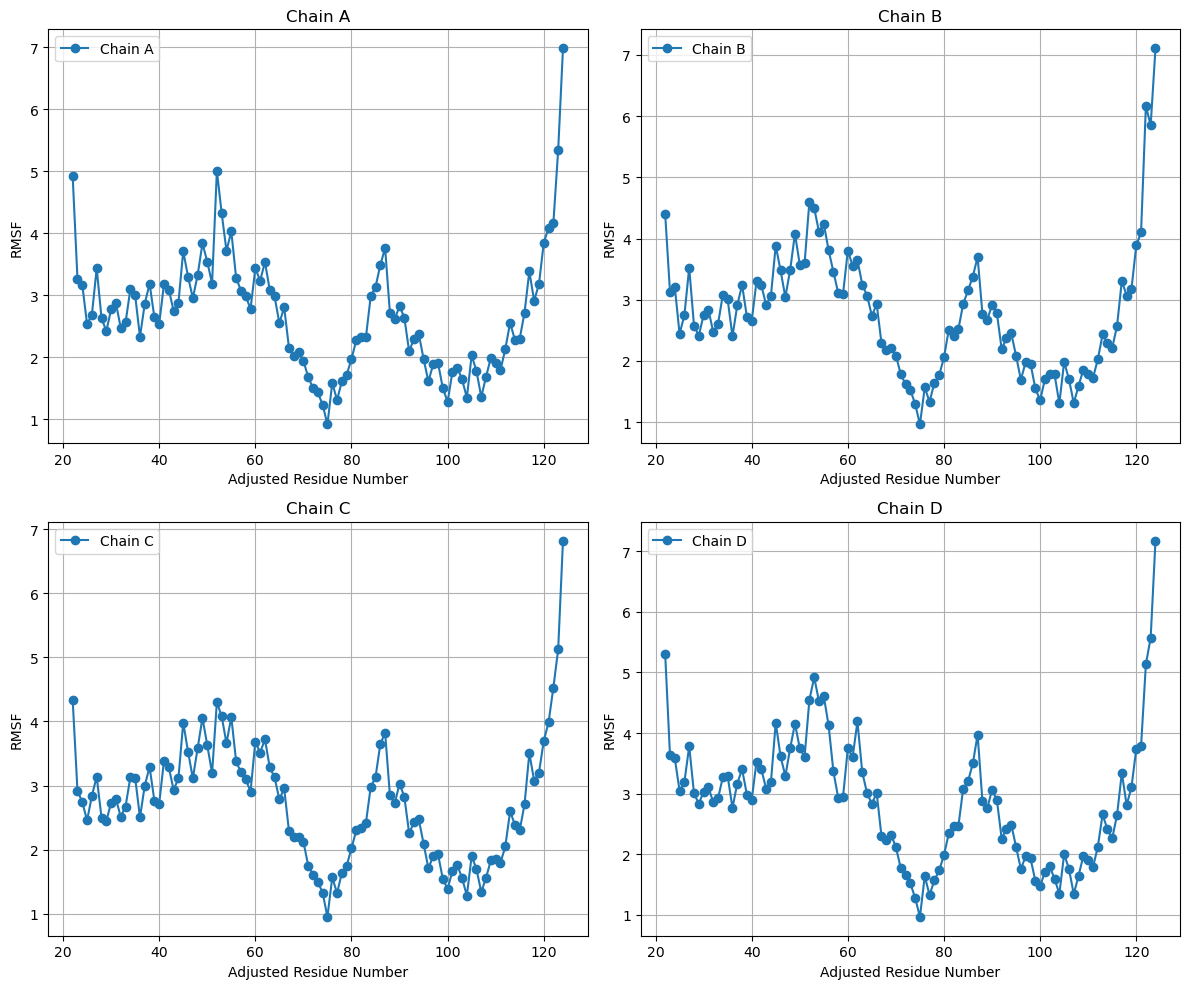

In [16]:
# Separate data by chains
chains = data['Chain'].unique()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, chain in enumerate(chains):
    chain_data = data[data['Chain'] == chain]
    x = chain_data['Adjusted_Residue_Number'].values
    y = chain_data['RMSF (Per Residue)'].values

    axes[i].plot(x, y, marker='o', label=f'Chain {chain}')
    axes[i].set_title(f'Chain {chain}')
    axes[i].set_xlabel('Adjusted Residue Number')
    axes[i].set_ylabel('RMSF')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()